# Chapter 3.3: How do you cross validate detection rates?

    LA’s detection rate ranged from approximately 10-20%, and Maricopa County had a similar range. Applying these detection rates to confirmed cases would produce another infection estimate, but this metric would incorporate a variable not directly produced by death counts. By cross validating a detection-rate based infection-estimate with the death-rate based infection-estimate, the validity of both estimation methods can be evaluated.
    To avoid confirmation bias of LA or Maricopa’s detection rates, a more honest test of accuracy would pull death and case counts from a different county all together. Choosing a conservative 20% average detection rate, I compared both estimates in Cook IL, Harrison TX, and Miami-Dade FL.

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [3]:
deaths_df = deaths_df[deaths_df['iso3'] == 'USA'] 
deaths_df = deaths_df.reset_index()
deaths_df = deaths_df.drop('index', axis=1)
deaths_df = deaths_df.fillna('0') 
deaths_df.to_csv('US_Deaths.csv', index = False)
deaths_df = deaths_df.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'FIPS', 'Admin2', 'Province_State', 'Population'], axis=1)

In [4]:
cases_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [5]:
cases_df = cases_df[cases_df['iso3'] == 'USA'] 
cases_df = cases_df.reset_index()
cases_df = cases_df.drop('index', axis=1)
cases_df = cases_df.fillna('0') 
cases_df = cases_df.fillna('0') 
cases_df.to_csv('US_Confirmed.csv', index=False)
cases_df = cases_df.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'FIPS', 'Admin2', 'Province_State'], axis=1)

In [6]:
cases_df_CK = cases_df.iloc[610,:]
cases_df_CK = cases_df_CK.reset_index()
deaths_df_CK = deaths_df.iloc[610,:]
deaths_df_CK = deaths_df_CK.reset_index()
index_val = len(deaths_df_CK.index)

In [7]:
for ind in deaths_df_CK.index:
    if (int(ind)+18) > index_val-1:
        deaths_df_CK.loc[ind, 'total_infections'] = deaths_df_CK.loc[ind-1, 'total_infections']
    else:
        deaths_df_CK.loc[ind, 'total_infections'] = deaths_df_CK.iloc[ind+18, 1] * 100

In [8]:
deaths_df_CK = deaths_df_CK[0:-18]
cases_df_CK['detection_cases'] = cases_df_CK[610] / 0.2
cases_df_CK = cases_df_CK[0:-18]

# Cook 

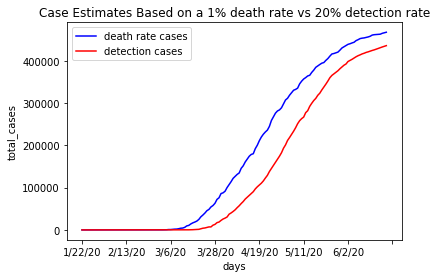

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(deaths_df_CK['index'], deaths_df_CK['total_infections'], color='blue', label='death rate cases')
ax1.plot(cases_df_CK['index'], cases_df_CK['detection_cases'], color='red', label='detection cases')
ax1.set_xlabel('days')
ax1.set_ylabel('total_cases')
plt.xticks(np.arange(0, 166, step=22)) 
ax1.set_title('Case Estimates Based on a 1% death rate vs 20% detection rate')
ax1.legend()

In [10]:
cases_df_HR = cases_df.iloc[362,:]
cases_df_HR = cases_df_HR.reset_index()
deaths_df_HR = deaths_df.iloc[362,:]
deaths_df_HR = deaths_df_HR.reset_index()
index_val = len(deaths_df_HR.index)

In [11]:
for ind in deaths_df_HR.index:
    if (int(ind)+18) > index_val-1:
        deaths_df_HR.loc[ind, 'total_infections'] = deaths_df_HR.loc[ind-1, 'total_infections']
    else:
        deaths_df_HR.loc[ind, 'total_infections'] = deaths_df_HR.iloc[ind+18, 1] * 100

In [12]:
deaths_df_HR = deaths_df_HR[0:-18]
cases_df_HR['detection_cases'] = cases_df_HR[362] / 0.2
cases_df_HR = cases_df_HR[0:-18]

# Miami-Dade

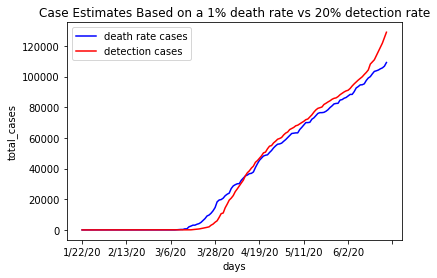

In [13]:
fig, ax2 = plt.subplots()
ax2.plot(deaths_df_HR['index'], deaths_df_HR['total_infections'], color='blue', label='death rate cases')
ax2.plot(cases_df_HR['index'], cases_df_HR['detection_cases'], color='red', label='detection cases')
ax2.set_xlabel('days')
ax2.set_ylabel('total_cases')
plt.xticks(np.arange(0, 166, step=22)) 
ax2.set_title('Case Estimates Based on a 1% death rate vs 20% detection rate')
ax2.legend()

In [14]:
cases_df_RS = cases_df.iloc[218,:]
cases_df_RS = cases_df_RS.reset_index()
deaths_df_RS = deaths_df.iloc[218,:]
deaths_df_RS = deaths_df_RS.reset_index()
index_val = len(deaths_df_RS.index)

In [15]:
for ind in deaths_df_RS.index:
    if (int(ind)+18) > index_val-1:
        deaths_df_RS.loc[ind, 'total_infections'] = deaths_df_RS.loc[ind-1, 'total_infections']
    else:
        deaths_df_RS.loc[ind, 'total_infections'] = deaths_df_RS.iloc[ind+18, 1] * 100

In [16]:
deaths_df_RS = deaths_df_RS[0:-18]
cases_df_RS['detection_cases'] = cases_df_RS[218] / 0.2
cases_df_RS = cases_df_RS[0:-18]

# Riverside

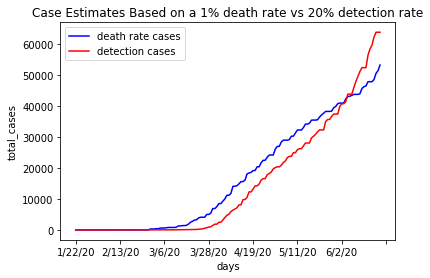

In [17]:
fig, ax2 = plt.subplots()
ax2.plot(deaths_df_RS['index'], deaths_df_RS['total_infections'], color='blue', label='death rate cases')
ax2.plot(cases_df_RS['index'], cases_df_RS['detection_cases'], color='red', label='detection cases')
ax2.set_xlabel('days')
ax2.set_ylabel('total_cases')
plt.xticks(np.arange(0, 166, step=22)) 
ax2.set_title('Case Estimates Based on a 1% death rate vs 20% detection rate')
ax2.legend()